In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra|
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19/.gitignore
/kaggle/input/covid19/README.md
/kaggle/input/covid19/csse_covid_19_data/README.md
/kaggle/input/covid19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/.gitignore
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/README.md
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_daily_reports_us/04-14-2020.csv
/kaggle/input/covid19/csse_covid_19_data/csse

In [2]:
file_name = ("/kaggle/input/covid19/csse_covid_19_data/csse_covid_19_daily_reports_us/04-12-2020.csv")
df = pd.read_csv(file_name)

In [3]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427,4.0,48.662422,42109.0,NaN,3.246753,84000004,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,641,NaN,22154,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176


In [4]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X = df[["Active"]]
Y = df[["Confirmed"]]

In [9]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
yhat = lm.predict(X)
yhat[0:10]

array([[ 4344.76470551],
       [ 1101.91989491],
       [ 4301.27052995],
       [ 2102.28593286],
       [23243.48973399],
       [ 7933.53993571],
       [12447.8307622 ],
       [ 2443.15889018],
       [  884.44901709],
       [ 2680.8596171 ]])

In [11]:
lm.intercept_

array([834.8858868])

In [12]:
lm.coef_

array([[1.01149245]])

# Equation of predicted line

        Confirmed = 834.8858868 + 1.01149245 * Active

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

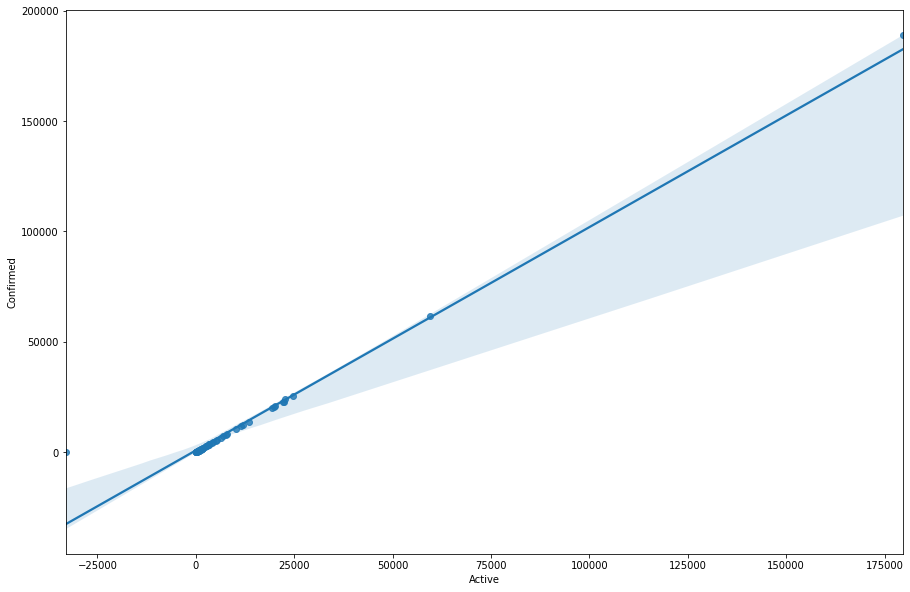

In [35]:
width = 15
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Active", y="Confirmed", data=df)

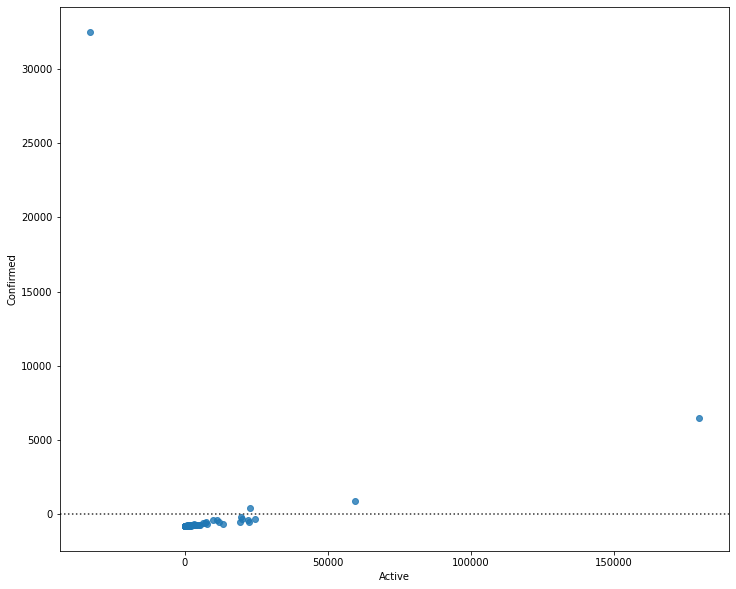

In [41]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Active'], df['Confirmed'])
plt.show()

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [56]:
Z = df[["Active", "Confirmed"]]
Z_pr=pr.fit_transform(Z)

In [58]:
Z.shape

(59, 2)

In [59]:
Z_pr.shape

(59, 6)

In [62]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [63]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [65]:
pipe.fit(Z, Y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [66]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([[3563.],
       [ 272.],
       [3542.],
       [1280.]])

In [68]:
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.9709046123701057


In [69]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[4344.76470551]
 [1101.91989491]
 [4301.27052995]
 [2102.28593286]]


In [70]:
from sklearn.metrics import mean_squared_error

In [76]:
mse = mean_squared_error(df['Confirmed'], Yhat)
print('The mean square error of Confirmed cases and predicted value is: ', mse)

The mean square error of Confirmed cases and predicted value is:  19184480.15637814


In [77]:
lm.fit(Z, df['Confirmed'])
print('The R-square is: ', lm.score(Z, df['Confirmed']))

The R-square is:  1.0


In [80]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [81]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [82]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[835.89737925],
       [836.90887171],
       [837.92036416],
       [838.93185662],
       [839.94334907]])

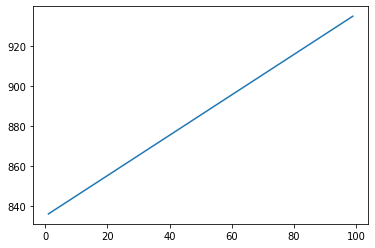

In [84]:
plt.plot(new_input, yhat)
plt.show()